# Souvik Ganguly -> Email spam detection

In [ ]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('/content/spam.csv',encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [ ]:
df=dataset.dropna(axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
x=df.v2
y=df.v1
lb=LabelEncoder()
y=lb.fit_transform(y)
y=y.reshape(-1,1)

In [ ]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
max_words=1000
max_len=150
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences=tok.texts_to_sequences(x_train)
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def rnn():
  inputs=Input(name='inputs',shape=[max_len])
  layer=Embedding(max_words,50,input_length=max_len)(inputs)
  layer=LSTM(64)(layer)
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5)(layer)
  layer=Dense(1,name='out_layer')(layer)
  layer=Activation('sigmoid')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model

In [ ]:
model=rnn()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,validation_split=0.25,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
27/27 [==============================] - 9s 238ms/step - loss: 0.4924 - accuracy: 0.8489 - val_loss: 0.3296 - val_accuracy: 0.8646
Epoch 2/10
27/27 [==============================] - 5s 196ms/step - loss: 0.2006 - accuracy: 0.9111 - val_loss: 0.0942 - val_accuracy: 0.9794


In [ ]:
test_sequences=tok.texts_to_sequences(x_test)
text_sequences_matrix=sequence.pad_sequences(test_sequences,maxlen=max_len)
acc=model.evaluate(text_sequences_matrix,y_test)

35/35 [==============================] - 1s 22ms/step - loss: 0.0926 - accuracy: 0.9785


Text(0.5, 1.0, 'accuracy range')

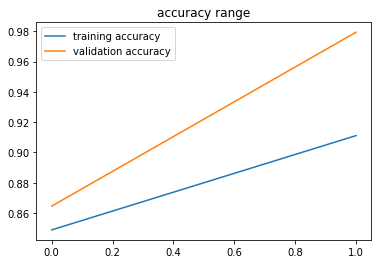

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'],loc='upper left')
plt.title("accuracy range")

Text(0.5, 1.0, 'training vs validation loss range')

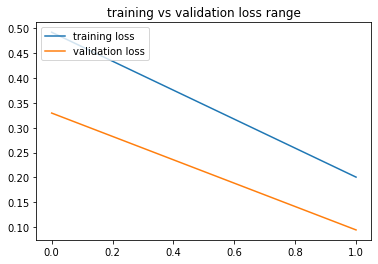

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'],loc='upper left')
plt.title("training vs validation loss range")

In [ ]:
from numpy.core.numeric import tensordot

#stop_words=['অবশ্য','অনেক','অনেকে','অনেকেই','অন্তত','অথবা','অথচ','অর্থাত','অর্থাৎ','অন্য','আজ','বাড়িয়ে','বাড়ছে','বুঝতে','ছড়িয়ে','জানিয়েছেন','আসবে','চলেছে','আনতে','আসছে','যেয়ে','ছাড়িয়ে','আছে','আপনার','আপনি','আবার','আমরা','আমাকে','আমাদের','আমার','আমি','আরও','আর','আগে','আগেই','আই','অতএব','আগামী','অবধি','অনুযায়ী','আদ্যভাগে','এই','একই','একে','একটি','এখন','এখনও','এখানে','এখানেই','এটি','এটা','এটাই','এতটাই','এবং','একবার','এবার','এদের','এঁদের','এমন','এমনকী','এল','এর','এরা','এঁরা','এস','এত','এতে','এসে','একে','এ','ঐ',' ই','ইহা','ইত্যাদি','উনি','উপর','উপরে','উচিত','ও','ওই','ওর','ওরা','ওঁর','ওঁরা','ওকে','ওদের','ওঁদের','ওখানে','কত','কবে','করতে','কয়েক','কয়েকটি','করবে','করলেন','করার','কারও','করা','করি','করিয়ে','করার','করাই','করলে','করলেন','করিতে','করিয়া','করেছিলেন','করছে','করছেন','করেছেন','করেছে','করেন','করবেন','করায়','করে','করেই','কাছ','কাছে','কাজে','কারণ','কিছু','কিছুই','কিন্তু','কিংবা','কি','কী','কেউ','কেউই','কাউকে','কেন','কে','কোনও','কোনো','কোন','কখনও','ক্ষেত্রে','খুব','গুলি','গিয়ে','গিয়েছে','গেছে','গেল','গেলে','গোটা','চলে','ছাড়া','ছাড়াও','ছিলেন','ছিল','জন্য','জানা','ঠিক','তিনি','তিনঐ','তিনিও','তখন','তবে','তবু','তাঁদের','তাঁাহারা','তাঁরা','তাঁর','তাঁকে','তাই','তেমন','তাকে','তাহা','তাহাতে','তাহার','তাদের','তারপর','তারা','তারৈ','তার','তাহলে','তিনি','তা','তাও','তাতে','তো','তত','তুমি','তোমার','তথা','থাকে','থাকা','থাকায়','থেকে','থেকেও','থাকবে','থাকেন','থাকবেন','থেকেই','দিকে','দিতে','দিয়ে','দিয়েছে','দিয়েছেন','দিলেন','দু','দুটি','দুটো','দেয়','দেওয়া','দেওয়ার','দেখা','দেখে','দেখতে','দ্বারা','ধরে','ধরা','নয়','নানা','না','নাকি','নাগাদ','নিতে','নিজে','নিজেই','নিজের','নিজেদের','নিয়ে','নেওয়া','নেওয়ার','নেই','নাই','পক্ষে','পর্যন্ত','পাওয়া','পারেন','পারি','পারে','পরে','পরেই','পরেও','পর','পেয়ে','প্রতি','প্রভৃতি','প্রায়','ফের','ফলে','ফিরে','ব্যবহার','বলতে','বললেন','বলেছেন','বলল','বলা','বলেন','বলে','বহু','বসে','বার','বা','বিনা','বরং','বদলে','বাদে','বার','বিশেষ','বিভিন্ন	বিষয়টি','ব্যবহার','ব্যাপারে','ভাবে','ভাবেই','মধ্যে','মধ্যেই','মধ্যেও','মধ্যভাগে','মাধ্যমে','মাত্র','মতো','মতোই','মোটেই','যখন','যদি','যদিও','যাবে','যায়','যাকে','যাওয়া','যাওয়ার','যত','যতটা','যা','যার','যারা','যাঁর','যাঁরা','যাদের','যান','যাচ্ছে','যেতে','যাতে','যেন','যেমন','যেখানে','যিনি','যে','রেখে','রাখা','রয়েছে','রকম','শুধু','সঙ্গে','সঙ্গেও','সমস্ত','সব','সবার','সহ','সুতরাং','সহিত','সেই','সেটা','সেটি','সেটাই','সেটাও','সম্প্রতি','সেখান','সেখানে','সে','স্পষ্ট','স্বয়ং','হইতে','হইবে','হৈলে','হইয়া','হচ্ছে','হত','হতে','হতেই','হবে','হবেন','হয়েছিল','হয়েছে','হয়েছেন','হয়ে','হয়নি','হয়','হয়েই','হয়তো','হল','হলে','হলেই','হলেও','হলো','হিসাবে','হওয়া','হওয়ার','হওয়ায়','হন','হোক','জন','জনকে','জনের','জানতে','জানায়','জানিয়ে','জানানো','জানিয়েছে','জন্য','জন্যওজে','জে','বেশ','দেন','তুলে','ছিলেন','চান','চায়','চেয়ে','মোট','যথেষ্ট','টি']

#text="আমার ত্বকে চুলকানি হয়  বমি হয় ক্লান্তি লাগে  ওজন কম হয়েছে এবং  ত্বক হলুদ  হয়েছে"
text="Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni..."
words=text.split()

#print(words)
t=' '.join(words)
test=[t]
print(test)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...']


In [ ]:
test_sequences = tok.texts_to_sequences(test)
test_padded = sequence.pad_sequences(test_sequences, maxlen=max_len)
print(test_padded)
predictions = model.predict(test_padded)
print(predictions)
y_pred = np.argmax(predictions, axis=1)
y,=y_pred
if (y == 0):
  print('HAM')
else:
  print('SPAM')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  50 458 766 778 686  64   8  92 120 309 151  69
   56 138  51 340 439   6]]
[[0.0191929]]
HAM
